In [5]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string 
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [6]:
# Loading the training and test datasets from directory
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA, plotting and splitting

In [7]:
train.head() #Previewing the data

,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
0,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...


In [8]:
train.tail()

,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
119994,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119998,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [9]:
#Inserting column names
train.columns = ['Class Index', 'Title', 'Description']

In [10]:
test.columns = ['Class Index', 'Title', 'Description']

In [11]:
train.tail(5)

,Class Index,Title,Description
119994,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119998,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [12]:
#Split Contents and labelling
index_to_label ={
    1:'World',
    2:'Sports',
    3:'Business',
    4:'Sci/Tech'
}

def return_dataset(dataset):
    label = dataset["Class Index"]
    label = pd.get_dummies(label)
    data = dataset["Title"] + " " + dataset["Description"]
    print(f"shape of data >> {data.shape}")
    print(f"shape of label >> {label.shape}\n")
    return data,label

train_data,train_label = return_dataset(train)
test_data,test_label = return_dataset(test)

shape of data >> (119999,)
shape of label >> (119999, 4)

shape of data >> (7599,)
shape of label >> (7599, 4)



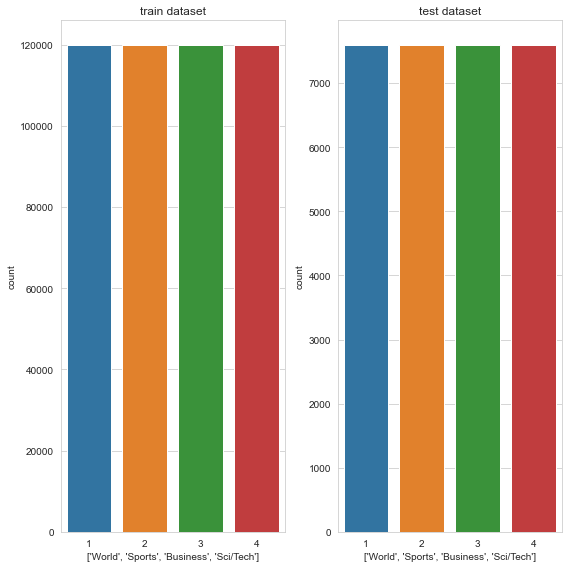

In [13]:
#EDA on both data sets
sns.set_style("whitegrid")

fig = plt.figure(figsize=(8,8))
axe1 = fig.add_subplot(1,2,1)
sns.countplot(data=train_label)
axe1.set_title("train dataset")
axe1.set_xlabel([index_to_label[i] for i in range(1,5)])

axe2 = fig.add_subplot(1,2,2)
sns.countplot(data=test_label)
axe2.set_title("test dataset")
axe2.set_xlabel([index_to_label[i] for i in range(1,5)])


plt.tight_layout()
plt.show()

# Data Preprocesssing(Tokenizing then Pad Sequences)


In [14]:
# Tokenizing the Data
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(train_data)
print(f"numbers of words used >> {len(tok.word_index)}")

word_size = 999
vocab_size = word_size+1 #1000

tok = Tokenizer(num_words=word_size)
tok.fit_on_texts(train_data)

word_index = tok.word_index
index_word = tok.index_word

train_data = tok.texts_to_sequences(train_data)
test_data = tok.texts_to_sequences(test_data)

print("First two samples")
print(train_data[0])
print(train_data[1])

numbers of words used >> 70344
First two samples
[877, 21, 21, 920, 811, 352, 99, 102, 22, 3, 8, 508, 509, 6, 5, 1, 530, 247, 22, 15, 7, 212, 368, 4, 1, 128]
[53, 6, 376, 766, 21, 21, 462, 90, 66, 1, 376, 6, 1, 766, 8, 284, 40, 191, 2, 34, 1, 296, 128, 111, 82, 233, 1, 4, 1]


maximum >> 127
minimum >> 1
average >> 26.063817198476652
median >> 25.0



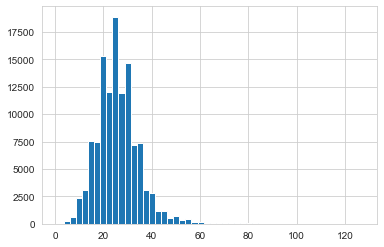

print first two samples
[877  21  21 920 811 352  99 102  22   3   8 508 509   6   5   1 530 247
  22  15   7 212 368   4   1 128   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[ 53   6 376 766  21  21 462  90  66   1 376   6   1 766   8 284  40 191
   2  34   1 296 128 111  82 233   1   4   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]

train data shape >> (119999, 50)
test data shape >> (7599, 50)


In [15]:
#Pad Sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(f"maximum >> {np.max([len(s)for s in train_data])}")
print(f"minimum >> {np.min([len(s)for s in train_data])}")
print(f"average >> {np.mean([len(s)for s in train_data])}")
print(f"median >> {np.median([len(s)for s in train_data])}\n")

lens = [len(s) for s in train_data]
plt.hist(lens,bins=50)
plt.show()

sequence_len = 50

train_data = pad_sequences(train_data,maxlen=sequence_len,padding='post',truncating='post')
test_data = pad_sequences(test_data,maxlen=sequence_len,padding='post',truncating='post')

print("print first two samples")
print(train_data[0])
print(train_data[1])

print("\ntrain data shape >>",train_data.shape)
print("test data shape >>",test_data.shape)

In [16]:
# Model and train-test
# Then we model with RNNs
from keras.layers import Input,Embedding,GlobalAveragePooling1D,Dense,LSTM,Bidirectional,TimeDistributed

def create_simple_model(word_vec_size=64):
    X = Input(shape=[sequence_len])
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_len)(X)
    H = GlobalAveragePooling1D()(H)
    Y = Dense(4,activation='softmax')(H)
    
    model = keras.models.Model(X,Y)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [17]:
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lr=0.0001,verbose=1)

def fit_test(model,n):
    hist = model.fit(train_data,train_label,batch_size=64,validation_split=0.2,epochs=n,verbose=0,callbacks=[reduceLR])
    result = model.evaluate(test_data,test_label)
    
    return hist,result

In [18]:
simple1 = create_simple_model(64)
fit_test(simple1,7)
plot_model(simple1)


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
238/238 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8572
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [19]:
simple2 = create_simple_model(128)
fit_test(simple2,7)
plot_model(simple2)


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
238/238 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8566
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
#Model with LSTM(RNN) : bidirectional,many-to-one,stacked
from keras.layers import Dropout

def create_LSTM(word_vec_size=64,hidden_size=64):
    X = Input(shape=[sequence_len])
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_len)(X)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Bidirectional(LSTM(int(hidden_size/2),return_sequences=True))(H)
    H = GlobalAveragePooling1D()(H)
    
    H = Dropout(0.2)(H)
    H = Dense(1024)(H)
    H = Dropout(0.2)(H)
    H = Dense(256)(H)
    H = Dropout(0.2)(H)
    H = Dense(32)(H)
    H = Dropout(0.1)(H)
    
    Y = Dense(4,activation='softmax')(H)
    
    model = keras.models.Model(X,Y)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [21]:
lstm1 = create_LSTM(256,256)
hist = lstm1.fit(train_data,train_label,batch_size=256,validation_split=0.2,epochs=10,verbose=1,callbacks=[reduceLR])
ev = lstm1.evaluate(test_data,test_label)

Epoch 1/10
375/375 [==============================] - 3641s 10s/step - loss: 0.5102 - accuracy: 0.8112 - val_loss: 0.3945 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 2/10
375/375 [==============================] - 3499s 9s/step - loss: 0.3889 - accuracy: 0.8656 - val_loss: 0.3917 - val_accuracy: 0.8563 - lr: 0.0010
Epoch 3/10
375/375 [==============================] - 3508s 9s/step - loss: 0.3701 - accuracy: 0.8713 - val_loss: 0.3802 - val_accuracy: 0.8605 - lr: 0.0010
Epoch 4/10
375/375 [==============================] - 3591s 10s/step - loss: 0.3521 - accuracy: 0.8760 - val_loss: 0.3914 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 5/10
375/375 [==============================] - 3540s 9s/step - loss: 0.3355 - accuracy: 0.8811 - val_loss: 0.3885 - val_accuracy: 0.8595 - lr: 0.0010
Epoch 6/10
375/375 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.8873
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
375/375 [==============================] 

In [ ]:
#Further exploration and modeling with Naive Bayes classifiers, and other Keras dependencies rerutns an average accuracy of 87%. 
#we can train and compare with is better